# 데이터 불러오는 코드

In [1]:
# import requests
# import xml
# import pandas as pd
# from bs4 import BeautifulSoup as BS
# import pprint

# # url 생성
# base_url = 'http://apis.data.go.kr/4720000/wanjulocalfoodsalemonth/getSaleMonthList'
# my_key = 'vTXdmolPuhGZjqfYVME8tsl+CC01HMdG3qnF34Ks3VEtCl0q6Y3npMm/yUGY4ZzTRlPuLTfkMDua2ullOmuYnA=='

# page_no = 1
# rows_no = 200000

# lst_rows = []

# # 페이지 범위 지정
# for i in range(2019, 2022):
#   params = {
#     'ServiceKey' : my_key,
#     'pageNo': page_no,
#     'numOfRows': rows_no,
#     'saleYear': i
#   }

#   # 서버에 응답 요청하기
#   response = requests.get(base_url, params=params)
#   contents = response.text

#   # 데이터 파싱하기
#   soup = BS(contents,'lxml-xml')
#   rows = soup.findAll('list')

#   # 행 단위 파싱
#   for row in rows:
#     dict_row = dict()
#     # 행의 콘텐츠 파싱
#     for rows_c in row.contents:
#       if rows_c.name is not None:
#         dict_row[rows_c.name] = rows_c.text
#       else:
#         break

#     # 콘텐츠를 행 단위로 저장(dict 형식)
#     lst_rows.append(pd.Series(dict_row))

# # 파싱 데이터를 판다스 데이터프레임 형식으로 바꾸기
# df = pd.concat(lst_rows, axis=1)
# df = df.T


# # 저장하기
# df.to_csv('19-21.csv')
# df

# # 저장하기
# df.to_csv('result.csv')
# df

# 머신러닝 코드

<a> 통계 모델 기준 : 근 2년간 </a><br>
<b> 2020년 1~12월 </b><br>
<b> 2021년 1~12월 </b><br>

<b> 월별 최다 판매 품목 통계 - Top 5가지 </b><br>
<b> 월별 최다 수익 품목 통계 - Top 5가지 </b><br>

<b> 통계 데이터 분석 및 그래프화 </b>

## 전처리

<a>NaN 값 있는지 확인</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./19-21.csv")

# 학습에 필요 없는 컬럼 지우기
for i in [0,1,4,-1]:
    df = df.drop(df.columns[i], axis=1)

df.isnull().sum()

# 개꿀~~ 너무맛있다 ~

saleMonth        0
saleProduct      0
saleQy           0
saleStore        0
saleUnitPrice    0
dtype: int64

<a>월별 저장후 전처리</a>

In [3]:
gr = df.groupby("saleMonth")

for i, group_data in gr:
    f = f"{i}_data.csv"
    group_data.to_csv(f,index=False)

<a> st 리스트에 1월부터 12월까지의 데이터 프레임 저장 </a>

In [4]:
st = []
for i in range(1, 13):
    st.append(pd.DataFrame(pd.read_csv(f"./{i}_data.csv")))


<a>최다 판매, 수익 top10</a>

In [5]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/NGULIM.TTF"  # 사용하려는 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

In [31]:
msp_list = []
msc_list = []
st1 = []
st2 = []

# 월별 그래프 저장
for month in range(1, 13):
    mrv_list = []
    mrp_list = []

    # 월별 데이터를 불러오기
    md = pd.read_csv(f"./{month}_data.csv")

    # 최다 판매 품목 찾기
    pss = md.groupby("saleProduct")["saleQy"].sum()
    msp = pss.nlargest(10)  # 판매 갯수 기준 상위 10개 품목
    msp_names = msp.index.tolist()
    msc = msp.tolist()

    # 최다 수익 품목을 찾습니다.
    md["total_revenue"] = md["saleQy"] * md["saleUnitPrice"]
    prs = md.groupby("saleProduct")["total_revenue"].sum()
    mrp = prs.nlargest(10)  # 수익 기준 상위 10개 품목
    mrp_names = mrp.index.tolist()
    mrv = (mrp / 1e8).tolist()

    # 월별 최다 판매 품목과 수익을 리스트에 추가
    msp_list.extend(msp_names)
    msc_list.extend(msc)

    mrp_list.extend(mrp_names)
    st1.extend(mrp_names)
    
    mrv_list.extend(mrv)
    st2.extend(mrv)

    # 그래프 그리기
    plt.figure(figsize=(12, 6))

    # 최다 판매 품목 그래프
    plt.subplot(1, 2, 1)

    cs = ["dodgerblue", "lightseagreen", "darkorange", "mediumvioletred", "darkolivegreen",
                   "royalblue", "darkorchid", "tomato", "gold", "cornflowerblue"]  # 보기 편한 색상으로 변환
    
    plt.barh(range(len(msp), 0, -1), msp.values, align="center", color=cs)
    plt.yticks(range(len(msp), 0, -1), msp_names)
    plt.xlabel("판매 갯수")
    plt.ylabel("품목")
    plt.title(f"{month}월 최다 판매 품목")

     # 최다 수익 품목 그래프
    plt.subplot(1, 2, 2)

    cr = ["deepskyblue", "lightcoral", "limegreen", "violet", "darkgreen",
          "cornflowerblue", "mediumorchid", "orangered", "khaki", "lightsteelblue"]  # 보기 편한 색상으로 변환

    # 최다 수익 품목의 총 수익 값을 가져와서 억 단위로 변경
    plt.barh(range(len(mrp_names), 0, -1), mrv, align="center", color=cr)
    plt.ylim(0, 11)

    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{x:.1f} 억"))

    plt.yticks(range(len(mrv_list), 0, -1),
               mrp_list)

    plt.xticks(range(11))
    plt.xlabel("총 수익 (억)")
    plt.ylabel("품목")
    plt.title(f"{month}월 최다 수익 품목")

    plt.tight_layout()

    # 그래프 저장 또는 화면에 표시
    plt.savefig(f"{month}_sales_revenue.png") 
    plt.close()


In [ ]:
# 월별 최다 판매 품목과 판매 갯수를 데이터프레임으로 만듬
msd = pd.DataFrame({
    "Month": [m for m in range(1, 13) for i in range(10)],
    "Rank": [j for i in range(12) for j in range(1, 11)],
    "Most Sold Product": msp_list,
    "Most Sold Count": msc_list
})


# 월별 최다 수익 품목과 수익을 데이터프레임으로 만듬
mrd = pd.DataFrame({
    "Month": [m for m in range(1, 13) for i in range(10)],
    "Rank": [j for i in range(12) for j in range(1, 11)],
    "Most Revenue Product": st1,
    "Most Revenue (억)": st2
})


# 최다 판매 품목과 수익을 각각 CSV 파일로 저장
msd.to_csv("월별_최다_판매_품목.csv", index=False, encoding="utf-8")
mrd.to_csv("월별_최다_수익_품목.csv", index=False, encoding="utf-8")


<a> 총 판매 품목, 수익 </a>

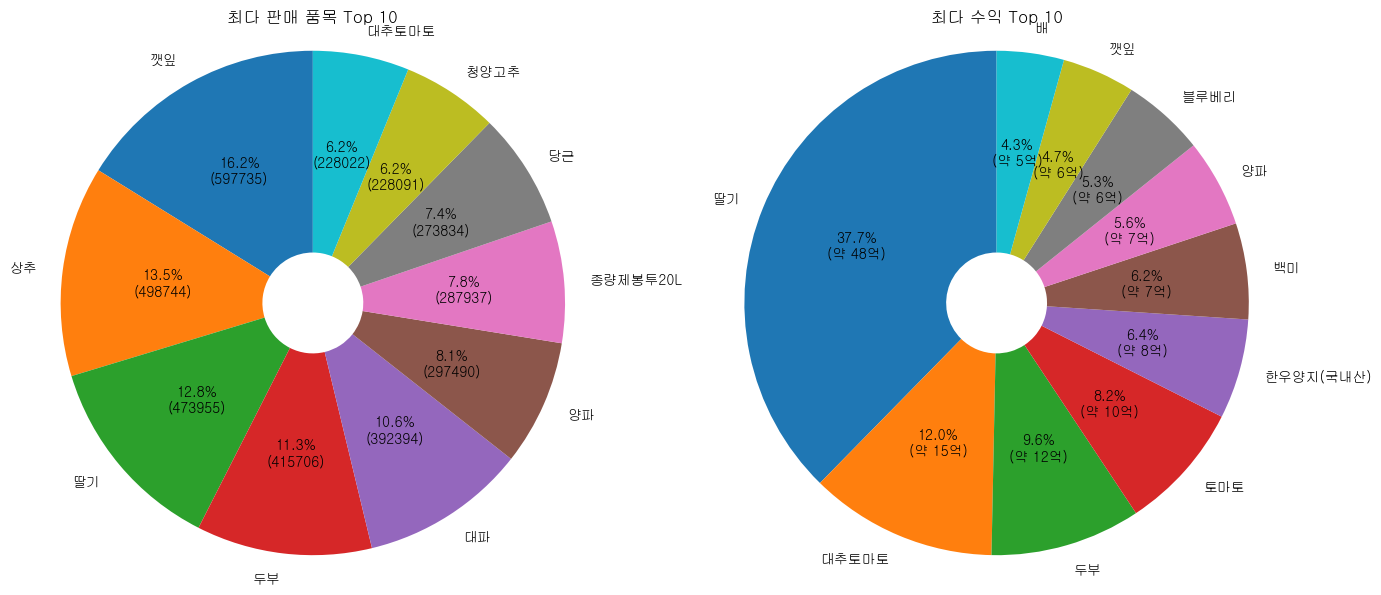

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("19-21.csv")

# 판매 품목 top 10
pss = data.groupby("saleProduct")["saleQy"].sum()
msp = pss.nlargest(10)
msp_names = msp.index.tolist()
msc = msp.tolist()

# 판매 수익 top 10
data["total_revenue"] = data["saleQy"] * data["saleUnitPrice"]
prs = data.groupby("saleProduct")["total_revenue"].sum()
mrp = prs.nlargest(10)
mrp_names = mrp.index.tolist()
mrv = mrp.tolist()

# 원형 그래프 그리기
plt.figure(figsize=(14, 6))

# 최다 판매 개수 Top 10 원형 그래프
plt.subplot(1, 2, 1)
plt.pie(msc, labels=msp_names,
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct * sum(msc) / 100)})', startangle=90, wedgeprops=dict(width=0.8))
plt.axis('equal')
plt.title("최다 판매 품목 Top 10")

# 최다 수익 Top 10 원형 그래프
plt.subplot(1, 2, 2)
plt.pie(mrv, labels=mrp_names,
        autopct=lambda pct: f'{pct:.1f}%\n(약 {int((pct * sum(mrv) / 100) / 100000000):,}억)', startangle=90, wedgeprops=dict(width=0.8))
plt.axis('equal')
plt.title("최다 수익 Top 10")

plt.tight_layout()

# 그래프 저장
plt.savefig("2년 최다 판매 품목, 수익.png")

# 그래프를 화면에 표시합니다.
plt.show()
